# 手写数字识别竞赛 

数字一共有10个(0~9),手写数字识别即是一个多分类问题，通过图片特征学习出该图片属于哪个数字

## 1. 利用pandas库导入数据 

导入训练数据和测试数据

In [1]:
# 导入训练数据和测试数据
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.info()
print('----------------------------------------------------------------------------')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


分析训练数据和测试数据提供的信息，Minst数据集总共包含70000个手写数字图片样本，在这个试验中，训练数据共有42000个样本，测试数据共有28000个样本

In [2]:
train_data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_data.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


图像的灰度特征值可以转化为灰度图像，每个样本均是一个28×28的灰度图像，也就是每个图片包含784个像素点，即784个特征；每个像素点均有一个灰度值，范围0~255，像素值越高，像素点越亮；训练集中每个样本都带有标签，训练集样本标签需进行训练。对训练集中的一些样本还原为灰度图像，将784维特征还原为28×28的灰度图像。

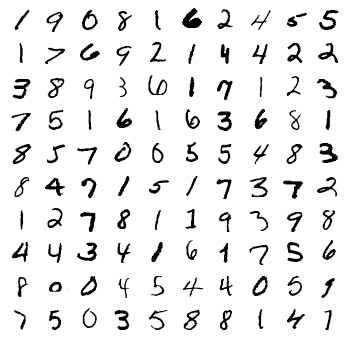

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')
plt.figure(figsize=(6,6))
for digit_num in range(0,100):
    plt.subplot(10,10,digit_num+1)
    # 从第一行开始隔100取一行，共取100行，并转化为100张28*28的灰度图像
    # 1*784维特征转化为28*28的2维灰度值矩阵
    grid_data = train_data.iloc[digit_num*100,1:].as_matrix().reshape(28,28)  
    plt.imshow(grid_data)
    plt.xticks([])
    plt.yticks([])
plt.show()

## 2. 特征降维与分类器训练 

在这个实验中，是通过在测试集上的分类准确率来评判分类器的优劣的，因此需要选择这个准确率这个值作为评估函数。

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

def clf_metric(clf, X, Y, split_ratio):
    # 将训练数据分为训练集和验证集
    trainX, testX, trainY, testY = train_test_split(X, Y, train_size=split_ratio, random_state=0)
    # 利用训练集训练分类器
    clf.fit(trainX, trainY)
    # 返回分类器在验证集上的正确率
    return clf.score(testX,testY)

In [6]:
# 训练数据的特征部分（X）和标签部分（Y）
train_data_Y = train_data['label']
train_data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data_X = train_data.iloc[:,1:]
train_data_X.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


选取的第一个分类器是随机森林分类模型，在这里，我们需要确定一个包含合适数目的树的随机森林，
我们选取训练数据中的5000个样本作为一个训练子集来训练随机森林模型，共十个随机森林模型，
分别包含 10,50,100,200,250,300,350,400,500颗树的森林。

In [8]:
# 选取训练数据的前5000个数据进行随机森林训练
# 利用随机森林训练数据，这里需要找出森林中树的合适个数。
n_estimators_array = np.array([10,50,100,150,200,250,300,350,400,500])
# 每棵树均训练10次，得到十次训练的结果，最后取十次结果的均值和方差
n_samples = 10
n_grid = len(n_estimators_array)
# 保存结果（训练了多少森林，取其中最优的森林的结果）
score_array_mu =np.zeros(n_grid)
score_array_sigma = np.zeros(n_grid)
j=0
for n_estimators in n_estimators_array:
    score_array=np.zeros(n_samples)
    for i in range(0,n_samples):
        clf = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        score_array[i] = clf_metric(clf, train_data_X.iloc[0:5000], train_data_Y.iloc[0:5000], 0.8)
    score_array_mu[j], score_array_sigma[j] = np.mean(score_array), np.std(score_array)
    j=j+1
print('不同数目树的森林模型的准确率（10次训练的均值）：\n',score_array_mu)
print('不同数目树的森林模型的方差（10次训练的结果的方差）：\n',score_array_sigma)

不同数目树的森林模型的准确率（10次训练的均值）：
 [ 0.8737  0.9157  0.9212  0.9226  0.9239  0.925   0.9251  0.9247  0.9244
  0.9261]
不同数目树的森林模型的方差（10次训练的结果的方差）：
 [ 0.00595063  0.0041      0.0049558   0.00241661  0.00211896  0.00260768
  0.00262488  0.00167631  0.0018      0.00181384]


通过作图分析树的数目与随机森林模型分类准确率的关系，找出合适数目树的随机森林模型。

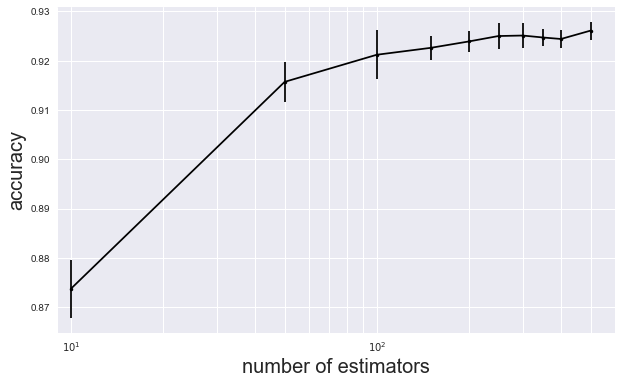

In [9]:
plt.figure(figsize=(10,6))
plt.errorbar(n_estimators_array, score_array_mu, yerr=score_array_sigma, fmt='k.-')
plt.xscale("log")
plt.xlabel("number of estimators",size = 20)
plt.ylabel("accuracy",size = 20)
plt.xlim(9,600)
plt.grid(which="both")
plt.show()

利用训练的随机森林分类模型的特性，对特征进行一个重要性的排序，找出比较重要的特征

特征重要性排名:
1. feature 409 (0.009736)
2. feature 350 (0.008751)
3. feature 378 (0.008456)
4. feature 406 (0.007391)
5. feature 461 (0.007272)
6. feature 433 (0.007254)
7. feature 347 (0.007121)
8. feature 318 (0.007002)
9. feature 405 (0.006862)
10. feature 437 (0.006812)
11. feature 377 (0.006767)
12. feature 375 (0.006644)
13. feature 514 (0.006607)
14. feature 462 (0.006300)
15. feature 542 (0.006294)
16. feature 346 (0.006217)
17. feature 401 (0.006212)
18. feature 434 (0.005953)
19. feature 515 (0.005778)
20. feature 489 (0.005754)


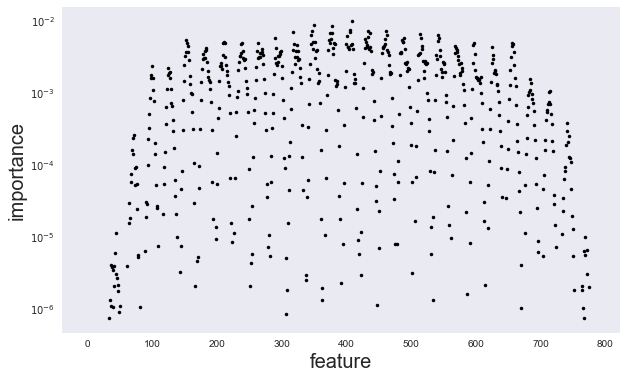

In [10]:
# np.argsort函数返回的是数组值从小到大的索引值
importances = clf.feature_importances_
idx = np.argsort(importances)[::-1]

print("特征重要性排名:")
for f in range(0,20):
    print("%d. feature %d (%f)" % (f + 1, idx[f], importances[idx[f]]))

plt.figure(figsize=(10,6))
plt.plot(idx[:],importances[idx[:]],'k.')
plt.yscale("log")
plt.xlabel("feature",size=20)
plt.ylabel("importance",size=20)
plt.show()

利用主成分分析技术（PCA）对特征就进行降维，若保留两个主成分，即保留两个主要特征，在这两个特征维度上，样本的标签是如何分布的。
选取20000个样本点进行散点图分析。

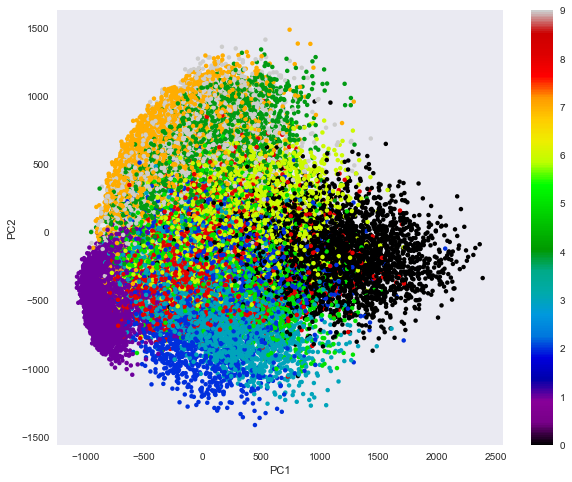

In [13]:
pca = PCA(n_components=2)
pca.fit(train_data_X)
transform = pca.transform(train_data_X)

plt.figure(figsize=(10,8))
plt.scatter(transform[:,0],transform[:,1], s=20, c = train_data_Y, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.clim(0,9)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

通过保留更多的主成分（特征），比较不同数目主成分下的方差百分比，选取一个合适的主成分数目进行保留。
方差百分比可以反应保留的特征与原始数据的接近程度，方差百分比越高，重构的原始数据越好。

In [15]:
# 保留的主成分数目
n_components_array=np.array([1,2,3,4,5,10,20,50,100,200,500])
vr = np.zeros(len(n_components_array))
i=0
for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(train_data_X)
    vr[i] = sum(pca.explained_variance_ratio_)
    i=i+1
print('不同数目主成分数目下的方差百分比：\n',vr)

不同数目主成分数目下的方差百分比：
 [ 0.09748938  0.16909204  0.23055107  0.28434409  0.33328671  0.48916761
  0.64477759  0.82550856  0.91471998  0.96624146  0.99925143]


作图分析主成分数目与方差百分比的关系图，一遍找出一个合适数目的主成分。

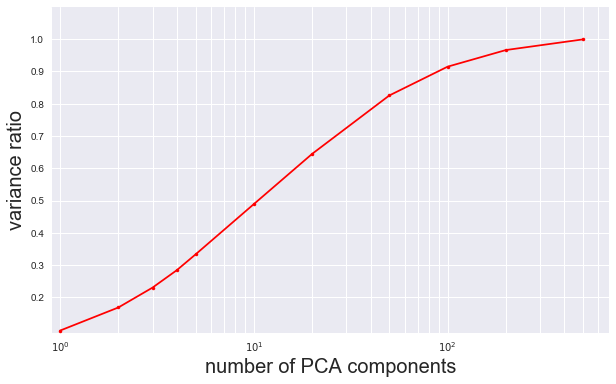

In [16]:
plt.figure(figsize=(10,6))
plt.plot(n_components_array,vr,'r.-')
plt.xscale("log")
plt.ylim(9e-2,1.1)
plt.yticks(np.linspace(0.2,1.0,9))
plt.xlim(0.9)
plt.grid(which="both")
plt.xlabel("number of PCA components",size=20)
plt.ylabel("variance ratio",size=20)
plt.show()

对原始高维特征数据（784维）进行PCA降维后，对于降维得到的数据，利用经典的KNN分类器，对训练数据中的前5000个样本进行训练。
在不同的主成分树目下，得到训练的分类器的准确率。

In [17]:
clf = KNeighborsClassifier()
#n_components_array=np.array([1,2,3,4,5,10,20,50,100,200,500])
score_array1 = np.zeros(len(n_components_array))
i=0

for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(train_data_X)
    transform = pca.transform(train_data_X.iloc[0:5000])
    score_array1[i] = clf_metric(clf, transform, train_data_Y.iloc[0:5000], 0.8)
    i=i+1
print('PCA保留不同主成分数目下，KNN分类器的准确率为：\n',score_array1)

PCA保留不同主成分数目下，KNN分类器的准确率为：
 [ 0.252  0.412  0.494  0.607  0.707  0.882  0.926  0.931  0.924  0.915
  0.915]


作图分析不同主成分下，KNN分类器的准确率曲线，以便于为KNN分类器选取合适的主成分数目。

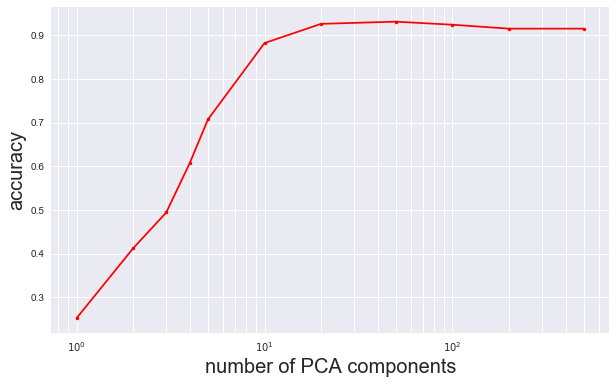

In [18]:
plt.figure(figsize=(10,6))
plt.plot(n_components_array,score_array1,'r.-')
plt.xscale('log')
plt.xlabel("number of PCA components", size=20)
plt.ylabel("accuracy", size=20)
plt.grid(which="both")
plt.show()

对于选取的5000个样本，从上图的曲线中可以发现，从保留20个主成分开始，KNN的分类器的准确率就比较稳定了，对于全部训练数据中的42000个样本，我们保留100个主成分进行数据降维，对得到的数据，训练KNN分类器，利用训练出的KNN分类器预测测试集的结果。

In [19]:
 
pca = PCA(n_components=100)
pca.fit(train_data_X)
transform_train = pca.transform(train_data_X)
transform_test = pca.transform(test_data)

clf = KNeighborsClassifier()
clf.fit(transform_train, train_data_Y)
results=clf.predict(transform_test)


In [20]:
Submission = pd.read_csv('sample_submission.csv')
Submission.head(3)

,ImageId,Label
0,1,0
1,2,0
2,3,0


KNN分类器在测试集上的预测结果保存为result_KNN.csv，并进行提交。

In [21]:
result_KNN = pd.DataFrame(columns=['ImageId','Label'])
result_KNN.ImageId = Submission.ImageId
result_KNN.Label = results
result_KNN.to_csv('result_KNN.csv',index=False)
result_KNN.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


作为对比，对于上面利用PCA降维得到的数据，也用随机森林分类模型进行预测，由随机森林中树的数目与分类器的准确率的曲线图，训练一颗含有
100棵树的随机森林，并利用训练得到的模型预测测试集。

In [22]:
clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
clf.fit(transform_train, train_data_Y)
results_1=clf.predict(transform_test)

利用随机森林分类模型预测得到的结果保存为result_RF.csv,也作为结果进行提交。

In [23]:
result_RF = pd.DataFrame(columns=['ImageId','Label'])
result_RF.ImageId = Submission.ImageId
result_RF.Label = results_1
result_RF.to_csv('result_RF.csv',index=False)
result_RF.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
